<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">pyVIRUS</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);"><b style=color:red;>Virus</b> modelling</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
<td><img style="height: 150px;" src="images/pyVIRUS.png"></td>
</tr>
</table>

----
# `pyVIRUS`

pyVIRUS, a program package for for modelling the spread and containment of a virus in a population.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, csv, datetime
import libVIRUS

----
In this notebook, we extract the **number of infected people** from the Corona data set.
## Read global and country data set
We first read the **global data set**, using the function `coronaReadDataGlobal()` from the previous notebook.

times,dataConfirmed,dataRecovered,dataDeath,ndataUsed = libVIRUS.coronaReadDataGlobal()

In [2]:
times,dataConfirmed,dataRecovered,dataDeath,ndataUsed = libVIRUS.coronaReadDataGlobal()

ndataConfirmed:  681
ndataRecovered:  681
ndataDeath:      681
11/28/21
Last date used:  7/1/21 526


Next, we use of the `countryInfected` array, which
was already calculated as difference between **confirmed** cases on the one hand,
and **dead** and **recovered** cases on the other hand.
$$
countryInfected = countyConfirmed - countryRecovered -countryDeath
$$

This array will indicate the number of **current** infections ...

We redefine the `coronaPlotDataCountry`function to account for infected cases:

In [3]:
def coronaPlotInfectedCountry(time,countyConfirmed,countryRecovered,countryDeath,countyInvected,ndataUsed,country='Germany'):
    """
    Corona virus
    Plot country infections
    input:
      time             - dates as datetime string
      countryConfirmed - number of confirmed cases per day 
      countryRecovered - number of recovered cases per day
      countryDeath     - number of dead cases per day
      countryInvected  - number of infected cases per day (calculated)
    output:
      (to file)
    """
    scale = 1e6
    plt.figure(figsize=(12.0,6.0))
    plt.title('Corona infections ('+country+')')
    plt.xlabel('Time')
    plt.xticks(rotation=45)
    plt.ylabel('Mill. people')
    plt.ylim([0,1.0])
    plt.fill_between(time,countyInvected/scale,0,edgecolor=(1,0,0,1.0),facecolor=(1,0,0,0.3),alpha=0.5,label='infected')
    plt.grid()
    plt.legend()
    return

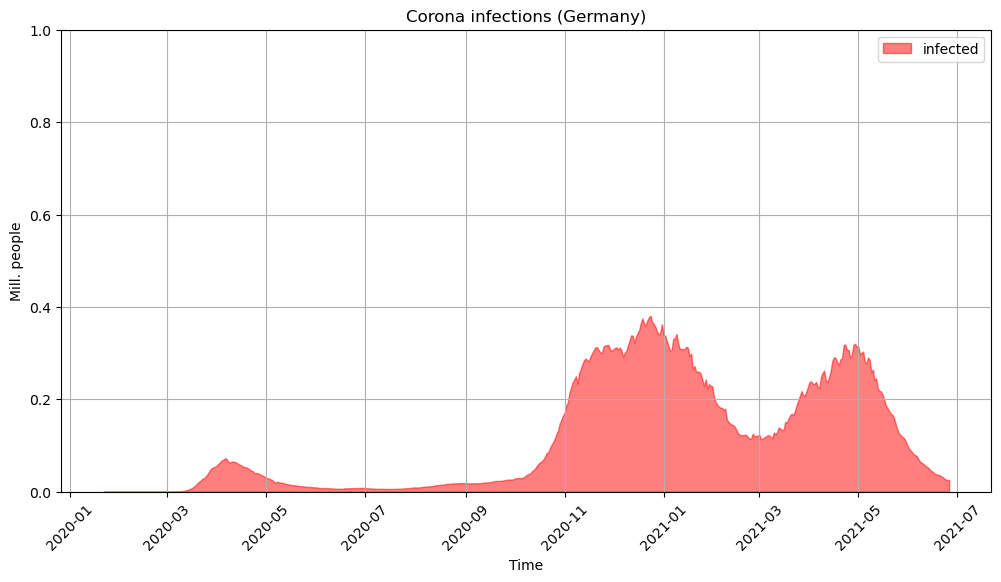

In [4]:
time,countyConfirmed,countryRecovered,countryDeath,countyInvected = libVIRUS.coronaGetDataCountry(times,dataConfirmed,
                         dataRecovered,dataDeath,ndataUsed,country='Germany')
coronaPlotInfectedCountry(time,countyConfirmed,countryRecovered,countryDeath,countyInvected,ndataUsed,country='Germany')

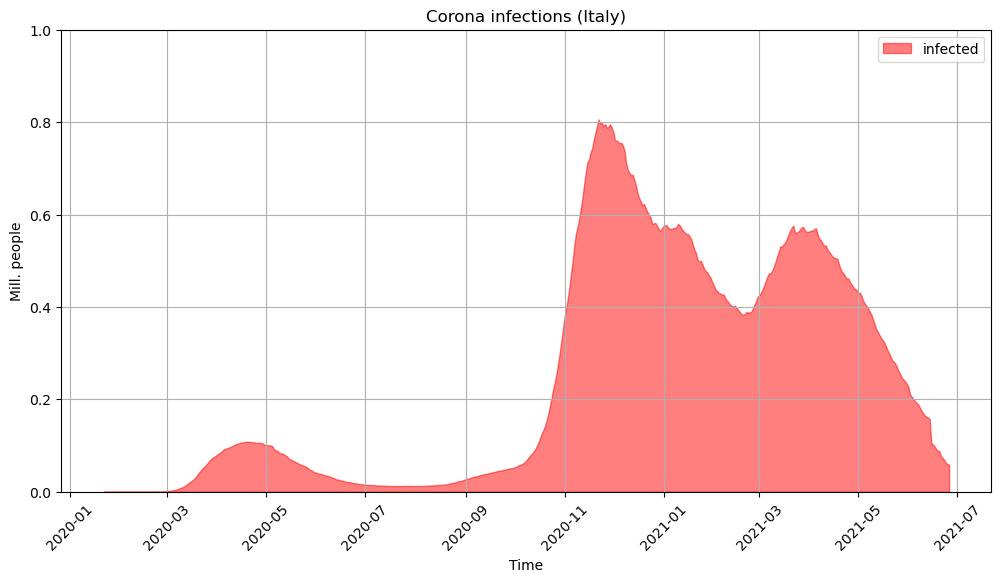

In [5]:
time,countyConfirmed,countryRecovered,countryDeath,countyInvected = libVIRUS.coronaGetDataCountry(times,dataConfirmed,
                         dataRecovered,dataDeath,ndataUsed,country='Italy')
coronaPlotInfectedCountry(time,countyConfirmed,countryRecovered,countryDeath,countyInvected,ndataUsed,country='Italy')

----